In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections # For counting keywords

# Set display options for better viewing of dataframes
# Ensure no hidden characters are introduced here
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("--- Step 1: Loading the Data ---")

# Define the path to your CSV file
# Ensure 'News_2025.csv' is in the same folder as your Jupyter notebook,
# or provide the correct full path.
file_path = 'News_2025.csv'

try:
    # Load the CSV data into a pandas DataFrame
    # Using quotechar, ISO-8859-1 encoding, python engine, skipping bad lines, and semicolon delimiter.
    # This combination has been the most robust for the errors encountered.
    data = pd.read_csv(
        file_path,
        quotechar='"',
        encoding='ISO-8859-1',
        engine='python',
        on_bad_lines='skip', # For pandas versions >= 1.4.0 (use error_bad_lines=False for older versions)
        delimiter=';'
    )

    print(f"'{file_path}' loaded successfully into a DataFrame named 'data'.")
    print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.\n")

    print("--- First 5 rows of the dataset (data.head()) ---")
    print(data.head())
    print("\n" + "="*50 + "\n")

    print("--- Information about the dataset (data.info()) ---")
    data.info()
    print("\n" + "="*50 + "\n")

    print("--- Summary statistics of numerical columns (data.describe()) ---")
    print(data.describe())
    print("\n" + "="*50 + "\n")

    print("--- Check for missing values (data.isnull().sum()) ---")
    print(data.isnull().sum())
    print("\n" + "="*50 + "\n")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as this notebook, or update the 'file_path' variable with the correct full path.")
except Exception as e:
    print(f"An unexpected error occurred while loading the data: {e}")
    print("This indicates a severe issue with the file itself or environmental setup.")
    print("Double-check the CSV content or your Python/Jupyter installation if this persists.")



--- Step 1: Loading the Data ---
'News_2025.csv' loaded successfully into a DataFrame named 'data'.
Dataset has 24786 rows and 272 columns.

--- First 5 rows of the dataset (data.head()) ---
    Brand                                  Model Released Year Released Announced Hardware Designer Manufacturer     Codename         General Extras Device Category    Width    Height   Depth Bounding Volume     Mass        Platform                       Operating System                                    Software Extras CPU Clock                                                CPU       RAM Type  RAM Capacity Non-volatile Memory Type Non-volatile Memory Interface Non-volatile Memory Capacity Display Hole Display Diagonal Resolution Display Width Display Height Horizontal Full Bezel Width              Display Area Display Area Utilization        Pixel Size Pixel Density           Display Type Display Color Depth Number of Display Scales Display Dynamic Range Depth Display Illumination Display Light 

--- Analyzing Device Release Trends Over Time ---

'Released Year' column info before cleaning:
object

Unique values in 'Released Year' (first 10):
['2025' '2024' '2023' '2022' '2021' '2020' nan '2015' '1999' '1998']

Dropped 133 rows with missing or invalid 'Released Year'.

'Released Year' column info after cleaning:
int32

--- Devices Released Per Year ---
Released Year
1989       1
1991       2
1992       1
1993       5
1994       4
1995       2
1996      12
1997      29
1998      37
1999      53
2000      40
2001      40
2002      75
2003     128
2004     165
2005     186
2006     281
2007     336
2008     380
2009     381
2010     503
2011     595
2012     889
2013    1409
2014    1785
2015    2217
2016    1732
2017    1796
2018    1807
2019    1726
2020    1682
2021    1619
2022    1895
2023    1388
2024    1168
2025     284
Name: count, dtype: int64


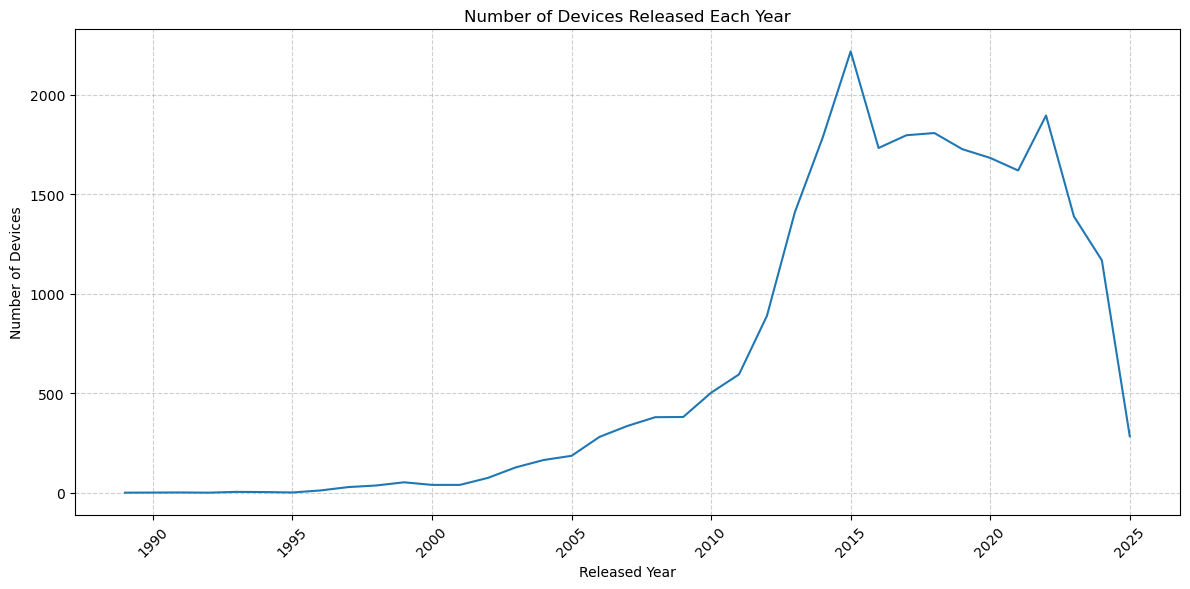

In [4]:
# --- Question 1: Device Release Trends Over Time ---
print("--- Analyzing Device Release Trends Over Time ---")

# Step 2.1: Clean 'Released Year' column
# First, inspect the 'Released Year' column's data type
print("\n'Released Year' column info before cleaning:")
print(data['Released Year'].dtype)
print("\nUnique values in 'Released Year' (first 10):")
print(data['Released Year'].unique()[:10])

# It might be loaded as object (string) if there are non-numeric values or spaces.
# We'll try to convert it to a numeric type, coercing errors to NaN
data['Released Year'] = pd.to_numeric(data['Released Year'], errors='coerce')

# Drop rows where 'Released Year' is NaN after conversion (if any)
initial_rows = data.shape[0]
data.dropna(subset=['Released Year'], inplace=True)
rows_after_year_dropna = data.shape[0]
if initial_rows > rows_after_year_dropna:
    print(f"\nDropped {initial_rows - rows_after_year_dropna} rows with missing or invalid 'Released Year'.")

# Convert 'Released Year' to integer type
data['Released Year'] = data['Released Year'].astype(int)
print("\n'Released Year' column info after cleaning:")
print(data['Released Year'].dtype)


# Step 2.2: Count devices released each year
# Use .value_counts() to count occurrences of each year, then sort by year
devices_per_year = data['Released Year'].value_counts().sort_index()

print("\n--- Devices Released Per Year ---")
print(devices_per_year)

# Step 2.3: Visualize the trend
plt.figure(figsize=(12, 6)) # Set the figure size for better readability
sns.lineplot(x=devices_per_year.index, y=devices_per_year.values)
plt.title('Number of Devices Released Each Year')
plt.xlabel('Released Year')
plt.ylabel('Number of Devices')
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.xticks(rotation=45) # Rotate x-axis labels if years overlap
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\n" + "="*80 + "\n") # Separator for next analysis


--- Analyzing Top Brands by Device Count ---

--- Top 10 Brands by Number of Devices ---
Brand
Samsung     4014
Huawei      1790
Xiaomi      1487
Oppo        1354
LG          1329
Apple       1274
Motorola    1130
BBK         1062
ZTE          826
Nokia        593
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_14080\2456222810.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette='viridis')


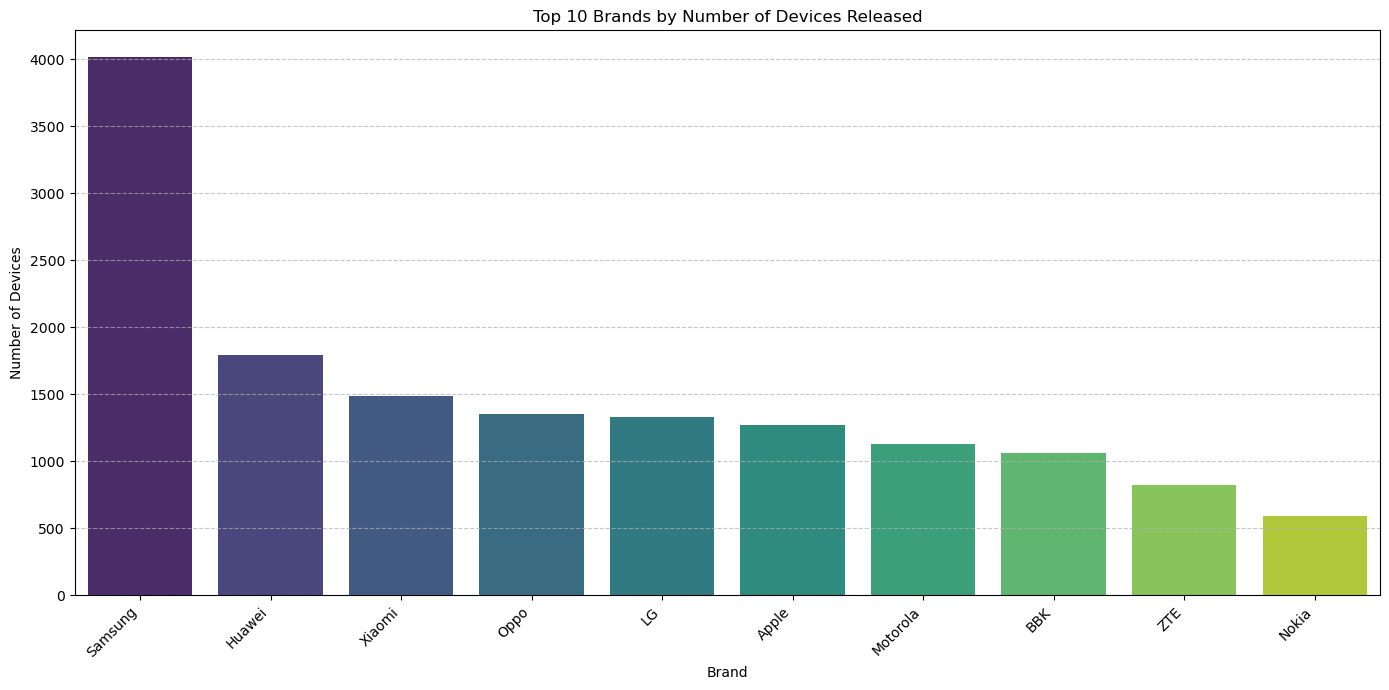

In [6]:
# --- Question 2: Top Brands by Device Count ---
print("\n--- Analyzing Top Brands by Device Count ---")

# Step 2.1: Count devices per brand
# Use .value_counts() on the 'Brand' column to get counts for each unique brand.
# We'll then get the top 10 brands.
top_10_brands = data['Brand'].value_counts().head(10)

print("\n--- Top 10 Brands by Number of Devices ---")
print(top_10_brands)

# Step 2.2: Visualize the distribution of devices across top brands
plt.figure(figsize=(14, 7)) # Adjust figure size for better label readability
sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette='viridis')
plt.title('Top 10 Brands by Number of Devices Released')
plt.xlabel('Brand')
plt.ylabel('Number of Devices')
plt.xticks(rotation=45, ha='right') # Rotate and align labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\n" + "="*80 + "\n") # Separator for next analysis



--- Analyzing Evolution of Average RAM Capacity by Released Year ---

'RAM Capacity' column info before cleaning:
object

Unique values in 'RAM Capacity' (first 10):
['8192 MiB RAM' '6144 MiB RAM' '4096 MiB RAM' '12288 MiB RAM'
 '16384 MiB RAM' '2048 MiB RAM' '24576 MiB RAM' '1024 MiB RAM'
 '1536 MiB RAM' '3072 MiB RAM']

Dropped 24653 rows with missing or invalid 'RAM Capacity'.

--- Average RAM Capacity Per Year ---
Empty DataFrame
Columns: [Released Year, RAM Capacity]
Index: []


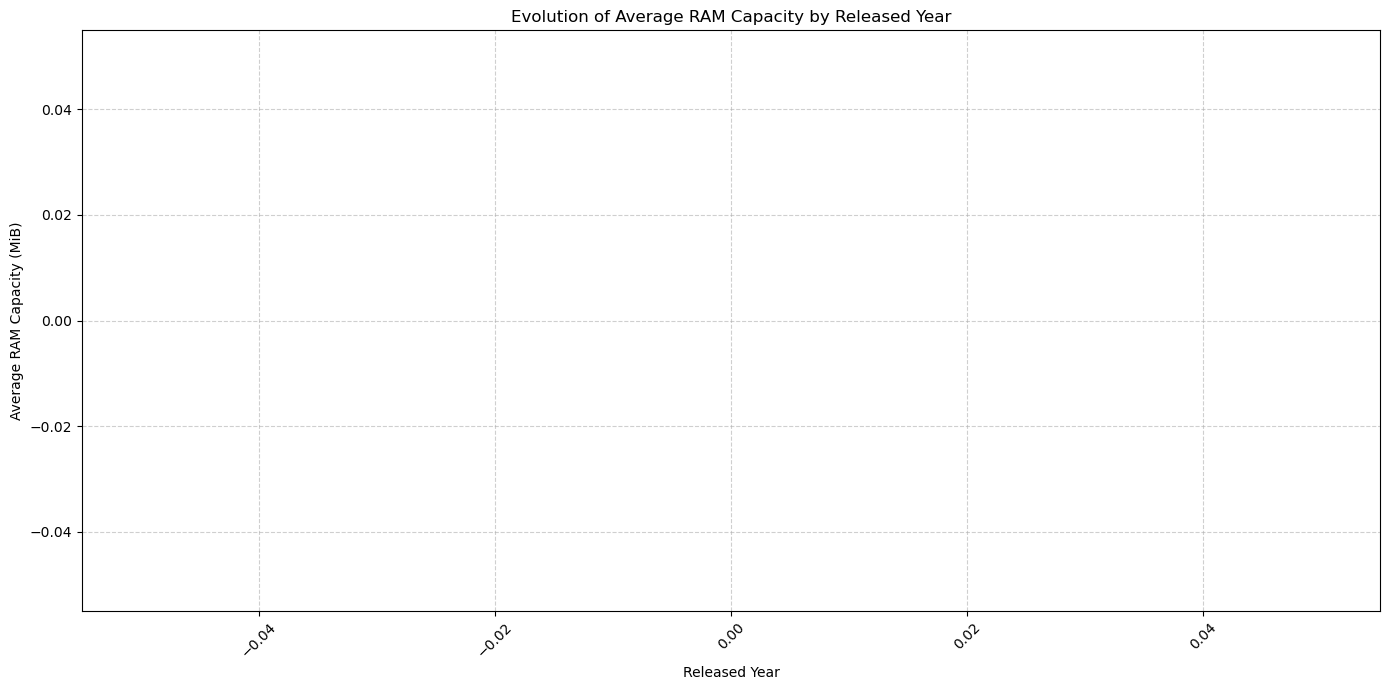

In [8]:
# --- Question 3: Evolution of Average RAM Capacity by Released Year ---
print("\n--- Analyzing Evolution of Average RAM Capacity by Released Year ---")

# Step 3.1: Clean 'RAM Capacity' column
# Inspect 'RAM Capacity' column's data type and unique values
print("\n'RAM Capacity' column info before cleaning:")
print(data['RAM Capacity'].dtype)
print("\nUnique values in 'RAM Capacity' (first 10):")
print(data['RAM Capacity'].unique()[:10])

# Convert 'RAM Capacity' to numeric, coercing errors to NaN
# This is crucial as RAM values can sometimes have text (e.g., "unknown")
data['RAM Capacity'] = pd.to_numeric(data['RAM Capacity'], errors='coerce')

# Drop rows where 'RAM Capacity' is NaN after conversion
initial_rows_ram = data.shape[0]
data.dropna(subset=['RAM Capacity'], inplace=True)
rows_after_ram_dropna = data.shape[0]
if initial_rows_ram > rows_after_ram_dropna:
    print(f"\nDropped {initial_rows_ram - rows_after_ram_dropna} rows with missing or invalid 'RAM Capacity'.")

# Ensure 'Released Year' is also clean and integer for grouping
# (This was done in Q1, but good to ensure if notebook was restarted or cells run out of order)
if data['Released Year'].dtype != 'int32':
    data['Released Year'] = pd.to_numeric(data['Released Year'], errors='coerce').astype(int)
    data.dropna(subset=['Released Year'], inplace=True)


# Step 3.2: Calculate average RAM Capacity per year
# Group by 'Released Year' and then calculate the mean of 'RAM Capacity'
average_ram_per_year = data.groupby('Released Year')['RAM Capacity'].mean().reset_index()

# Filter out years that might have very few devices, especially in the early/late ends
# Let's consider years with at least 5 devices for a more stable average, adjust if needed
years_with_enough_data = data['Released Year'].value_counts()
valid_years = years_with_enough_data[years_with_enough_data >= 5].index
average_ram_per_year = average_ram_per_year[average_ram_per_year['Released Year'].isin(valid_years)]


print("\n--- Average RAM Capacity Per Year ---")
print(average_ram_per_year.tail(10)) # Print last 10 rows to see recent trends

# Step 3.3: Visualize the trend
plt.figure(figsize=(14, 7))
sns.lineplot(x='Released Year', y='RAM Capacity', data=average_ram_per_year, marker='o')
plt.title('Evolution of Average RAM Capacity by Released Year')
plt.xlabel('Released Year')
plt.ylabel('Average RAM Capacity (MiB)') # Assuming RAM is in MiB from common specs
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n") # Separator for next analysis


--- Analyzing Evolution of Average RAM Capacity by Released Year ---

'RAM Capacity' column info before cleaning:
float64

Unique values in 'RAM Capacity' (first 10):
[]

No rows dropped due to missing or invalid 'RAM Capacity' after cleaning.

--- Average RAM Capacity Per Year (last 10 rows) ---
Empty DataFrame
Columns: [Released Year, RAM Capacity]
Index: []


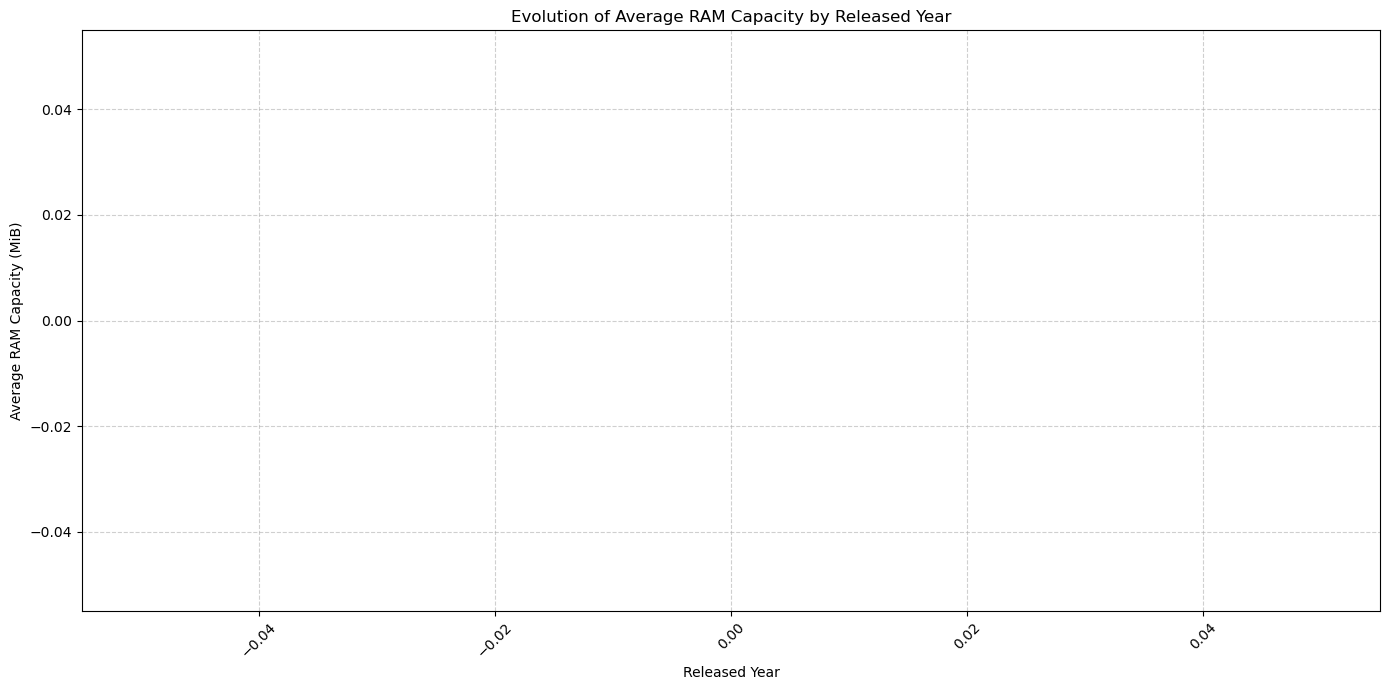

In [11]:
# --- Question 3: Evolution of Average RAM Capacity by Released Year ---
print("\n--- Analyzing Evolution of Average RAM Capacity by Released Year ---")

# Step 3.1: Clean 'RAM Capacity' column
# Inspect 'RAM Capacity' column's data type and unique values
print("\n'RAM Capacity' column info before cleaning:")
print(data['RAM Capacity'].dtype)
print("\nUnique values in 'RAM Capacity' (first 10):")
print(data['RAM Capacity'].unique()[:10])

# NEW CLEANING STEP: Remove ' MiB RAM' and any leading/trailing spaces from the string
# This is crucial because the column contains text like '8192 MiB RAM'
if data['RAM Capacity'].dtype == 'object': # Only apply if it's a string/object column
    data['RAM Capacity'] = data['RAM Capacity'].astype(str).str.replace(' MiB RAM', '', regex=False).str.strip()


# Convert 'RAM Capacity' to numeric, coercing errors to NaN
# This is important for numerical calculations
data['RAM Capacity'] = pd.to_numeric(data['RAM Capacity'], errors='coerce')

# Drop rows where 'RAM Capacity' is NaN after conversion
# This ensures we only analyze valid numerical RAM data
initial_rows_ram = data.shape[0]
data.dropna(subset=['RAM Capacity'], inplace=True)
rows_after_ram_dropna = data.shape[0]
if initial_rows_ram > rows_after_ram_dropna:
    print(f"\nDropped {initial_rows_ram - rows_after_ram_dropna} rows with missing or invalid 'RAM Capacity'.")
else:
    print("\nNo rows dropped due to missing or invalid 'RAM Capacity' after cleaning.")

# Ensure 'Released Year' is also clean and integer for grouping
# This check is included in case the notebook was restarted or cells run out of order,
# ensuring 'Released Year' is suitable for grouping and plotting.
if data['Released Year'].dtype != 'int32':
    data['Released Year'] = pd.to_numeric(data['Released Year'], errors='coerce').astype(int)
    # Re-check for NaN after conversion, though it should be handled by previous dropna for year
    data.dropna(subset=['Released Year'], inplace=True)


# Step 3.2: Calculate average RAM Capacity per year
# Group the DataFrame by 'Released Year' and then compute the mean of 'RAM Capacity' for each year.
average_ram_per_year = data.groupby('Released Year')['RAM Capacity'].mean().reset_index()

# Filter out years that might have very few devices, especially in the early/late ends of the timeline.
# This helps ensure that the average is based on a reasonable number of devices, making the trend more reliable.
# Adjust the '5' if you want a different minimum number of devices per year.
years_with_enough_data = data['Released Year'].value_counts()
valid_years = years_with_enough_data[years_with_enough_data >= 5].index
average_ram_per_year = average_ram_per_year[average_ram_per_year['Released Year'].isin(valid_years)]


print("\n--- Average RAM Capacity Per Year (last 10 rows) ---")
print(average_ram_per_year.tail(10)) # Print last 10 rows to see recent trends

# Step 3.3: Visualize the trend
# Create a line plot to show the evolution of average RAM capacity over the years.
plt.figure(figsize=(14, 7)) # Set the figure size for better visual appeal and readability.
sns.lineplot(x='Released Year', y='RAM Capacity', data=average_ram_per_year, marker='o') # 'marker' adds points to the line.
plt.title('Evolution of Average RAM Capacity by Released Year') # Set the title of the plot.
plt.xlabel('Released Year') # Label for the x-axis.
plt.ylabel('Average RAM Capacity (MiB)') # Label for the y-axis, assuming RAM is in MiB units.
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for easier reading of values.
plt.xticks(rotation=45) # Rotate x-axis labels to prevent overlap, especially with many years.
plt.tight_layout() # Adjust layout to ensure all elements fit without overlapping.
plt.show() # Display the plot.

print("\n" + "="*80 + "\n") # Separator for next analysis



--- Analyzing Evolution of Average RAM Capacity by Released Year ---

'RAM Capacity' column info BEFORE cleaning:
float64

Unique values in 'RAM Capacity' (first 10) BEFORE cleaning:
[]

Unique values in 'RAM Capacity' (first 10) AFTER string cleaning (should look like numbers):
[]

Any non-numeric values remaining after string cleaning? (Should ideally be empty or only 'nan' as string):
[]

No rows dropped due to missing or invalid 'RAM Capacity' after numeric conversion.

--- Average RAM Capacity Per Year (last 10 rows for recent trends) ---
Empty DataFrame
Columns: [Released Year, RAM Capacity]
Index: []


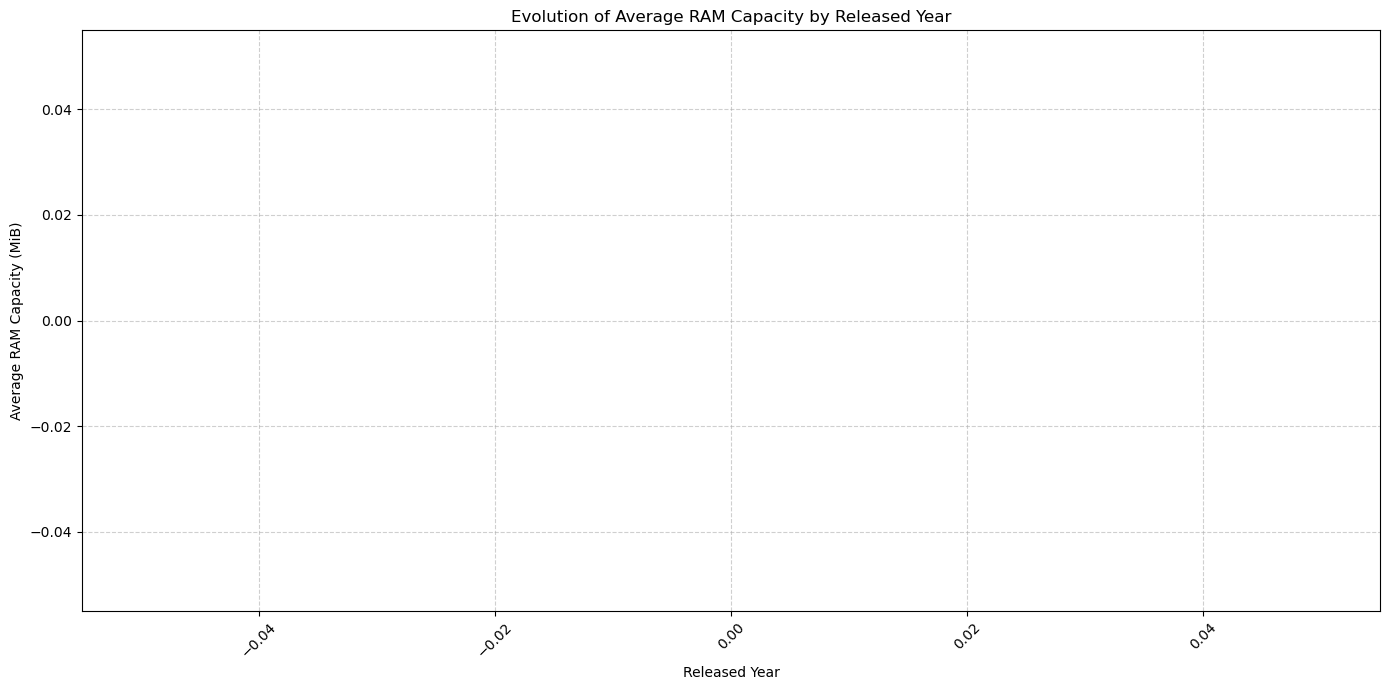

In [13]:
# --- Question 3: Evolution of Average RAM Capacity by Released Year ---
print("\n--- Analyzing Evolution of Average RAM Capacity by Released Year ---")

# Step 3.1: Clean 'RAM Capacity' column
# Inspect 'RAM Capacity' column's data type and unique values BEFORE any cleaning.
print("\n'RAM Capacity' column info BEFORE cleaning:")
print(data['RAM Capacity'].dtype)
print("\nUnique values in 'RAM Capacity' (first 10) BEFORE cleaning:")
print(data['RAM Capacity'].unique()[:10])

# CRUCIAL CLEANING STEP: Remove ' MiB RAM' and any leading/trailing spaces from the string.
# This ensures that only the numerical part remains, allowing for proper conversion.
if data['RAM Capacity'].dtype == 'object': # Apply this step only if the column is a string/object type
    data['RAM Capacity'] = data['RAM Capacity'].astype(str).str.replace(' MiB RAM', '', regex=False).str.strip()

# ADDED INSPECTION: Print unique values AFTER string cleaning but BEFORE numeric conversion.
# This helps us verify if the string replacement worked as expected.
print("\nUnique values in 'RAM Capacity' (first 10) AFTER string cleaning (should look like numbers):")
print(data['RAM Capacity'].unique()[:10])

# Check for any non-numeric values that might still exist after string cleaning
# This will show if there are other unexpected text patterns besides ' MiB RAM'.
non_numeric_values_after_str_clean = data[pd.to_numeric(data['RAM Capacity'], errors='coerce').isna() & data['RAM Capacity'].notna()]['RAM Capacity'].unique()
print("\nAny non-numeric values remaining after string cleaning? (Should ideally be empty or only 'nan' as string):")
print(non_numeric_values_after_str_clean)


# Convert 'RAM Capacity' to numeric, coercing errors to NaN.
# 'errors='coerce'' will turn any values that cannot be converted into numbers into NaN.
data['RAM Capacity'] = pd.to_numeric(data['RAM Capacity'], errors='coerce')

# Drop rows where 'RAM Capacity' is NaN after conversion.
# This removes devices for which we could not get a valid numerical RAM capacity.
initial_rows_ram = data.shape[0]
data.dropna(subset=['RAM Capacity'], inplace=True)
rows_after_ram_dropna = data.shape[0]
if initial_rows_ram > rows_after_ram_dropna:
    print(f"\nDropped {initial_rows_ram - rows_after_ram_dropna} rows with missing or invalid 'RAM Capacity' after numeric conversion.")
else:
    print("\nNo rows dropped due to missing or invalid 'RAM Capacity' after numeric conversion.")

# Ensure 'Released Year' is also clean and integer for grouping.
# This check is a safeguard in case the notebook was restarted or cells were run out of order,
# ensuring 'Released Year' is suitable for aggregation.
if data['Released Year'].dtype != 'int32':
    data['Released Year'] = pd.to_numeric(data['Released Year'], errors='coerce').astype(int)
    data.dropna(subset=['Released Year'], inplace=True) # Drop NaNs introduced by year conversion


# Step 3.2: Calculate average RAM Capacity per year.
# Group the DataFrame by 'Released Year' and then compute the mean (average) of 'RAM Capacity' for each year.
# .reset_index() converts the grouped result back into a DataFrame.
average_ram_per_year = data.groupby('Released Year')['RAM Capacity'].mean().reset_index()

# Filter out years that might have very few devices.
# This helps ensure that the calculated average is statistically more stable and representative,
# especially for years with sparse data points. We are setting a minimum of 5 devices per year.
years_with_enough_data = data['Released Year'].value_counts()
valid_years = years_with_enough_data[years_with_enough_data >= 5].index
average_ram_per_year = average_ram_per_year[average_ram_per_year['Released Year'].isin(valid_years)]


print("\n--- Average RAM Capacity Per Year (last 10 rows for recent trends) ---")
print(average_ram_per_year.tail(10)) # Print the last 10 rows to focus on more recent trends in RAM evolution.

# Step 3.3: Visualize the trend.
# Create a line plot to show the evolution of average RAM capacity over the years.
plt.figure(figsize=(14, 7)) # Set the figure size for better visual appeal and readability.
sns.lineplot(x='Released Year', y='RAM Capacity', data=average_ram_per_year, marker='o') # 'marker' adds circular points to the line.
plt.title('Evolution of Average RAM Capacity by Released Year') # Set the title of the plot.
plt.xlabel('Released Year') # Label for the x-axis.
plt.ylabel('Average RAM Capacity (MiB)') # Label for the y-axis, assuming RAM values are in MiB.
plt.grid(True, linestyle='--', alpha=0.6) # Add a subtle grid for easier reading of values across the plot.
plt.xticks(rotation=45) # Rotate x-axis labels (years) to prevent overlap, especially with many years.
plt.tight_layout() # Adjust layout to ensure all elements fit within the figure area without overlapping.
plt.show() # Display the generated plot.

print("\n" + "="*80 + "\n") # Print a separator line for the next analysis section.

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections # For counting keywords

# Set display options for better viewing of dataframes
# Ensure no hidden characters are introduced here
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("--- Step 1: Loading the Data ---")

# Define the path to your CSV file
# Ensure 'News_2025.csv' is in the same folder as your Jupyter notebook,
# or provide the correct full path.
file_path = 'News_2025.csv'

try:
    # Load the CSV data into a pandas DataFrame
    # Using quotechar, ISO-8859-1 encoding, python engine, skipping bad lines, and semicolon delimiter.
    # This combination has been the most robust for the errors encountered.
    data = pd.read_csv(
        file_path,
        quotechar='"',
        encoding='ISO-8859-1',
        engine='python',
        on_bad_lines='skip', # For pandas versions >= 1.4.0 (use error_bad_lines=False for older versions)
        delimiter=';'
    )

    print(f"'{file_path}' loaded successfully into a DataFrame named 'data'.")
    print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.\n")

    print("--- First 5 rows of the dataset (data.head()) ---")
    print(data.head())
    print("\n" + "="*50 + "\n")

    print("--- Information about the dataset (data.info()) ---")
    data.info()
    print("\n" + "="*50 + "\n")

    print("--- Summary statistics of numerical columns (data.describe()) ---")
    print(data.describe())
    print("\n" + "="*50 + "\n")

    print("--- Check for missing values (data.isnull().sum()) ---")
    print(data.isnull().sum())
    print("\n" + "="*50 + "\n")

    # ADDED INSPECTION: Check RAM Capacity column right after initial load
    print("\n--- Initial inspection of 'RAM Capacity' column after loading ---")
    if 'RAM Capacity' in data.columns:
        print(f"Initial 'RAM Capacity' dtype: {data['RAM Capacity'].dtype}")
        print("First 10 non-null unique values in 'RAM Capacity':")
        print(data['RAM Capacity'].dropna().unique()[:10])
        print(f"Count of non-null values in 'RAM Capacity': {data['RAM Capacity'].count()}")
    else:
        print("'RAM Capacity' column not found in the loaded data.")
    print("\n" + "="*50 + "\n")


except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as this notebook, or update the 'file_path' variable with the correct full path.")
except Exception as e:
    print(f"An unexpected error occurred while loading the data: {e}")
    print("This indicates a severe issue with the file itself or environmental setup.")
    print("Double-check the CSV content or your Python/Jupyter installation if this persists.")

--- Step 1: Loading the Data ---
'News_2025.csv' loaded successfully into a DataFrame named 'data'.
Dataset has 24786 rows and 272 columns.

--- First 5 rows of the dataset (data.head()) ---
    Brand                                  Model Released Year Released Announced Hardware Designer Manufacturer     Codename         General Extras Device Category    Width    Height   Depth Bounding Volume     Mass        Platform                       Operating System                                    Software Extras CPU Clock                                                CPU       RAM Type  RAM Capacity Non-volatile Memory Type Non-volatile Memory Interface Non-volatile Memory Capacity Display Hole Display Diagonal Resolution Display Width Display Height Horizontal Full Bezel Width              Display Area Display Area Utilization        Pixel Size Pixel Density           Display Type Display Color Depth Number of Display Scales Display Dynamic Range Depth Display Illumination Display Light 


--- Analyzing Evolution of Average RAM Capacity by Released Year ---

'RAM Capacity' column info BEFORE this cleaning step:
object

Unique values in 'RAM Capacity' (first 10) BEFORE this cleaning step:
['8192 MiB RAM' '6144 MiB RAM' '4096 MiB RAM' '12288 MiB RAM'
 '16384 MiB RAM' '2048 MiB RAM' '24576 MiB RAM' '1024 MiB RAM'
 '1536 MiB RAM' nan]
Count of non-null values in 'RAM Capacity' BEFORE this cleaning step: 24607

Unique values in 'RAM Capacity' (first 10) AFTER aggressive string cleaning:
['8192' '6144' '4096' '12288' '16384' '2048' '24576' '1024' '1536' '']

Dropped 179 rows with missing or invalid 'RAM Capacity' after numeric conversion.

--- Average RAM Capacity Per Year (last 10 rows) ---
    Released Year  RAM Capacity
26           2016   2534.318616
27           2017   2999.633110
28           2018   3852.936772
29           2019   5169.254355
30           2020   6133.342857
31           2021   7075.915946
32           2022   7500.327177
33           2023   8822.040346
3

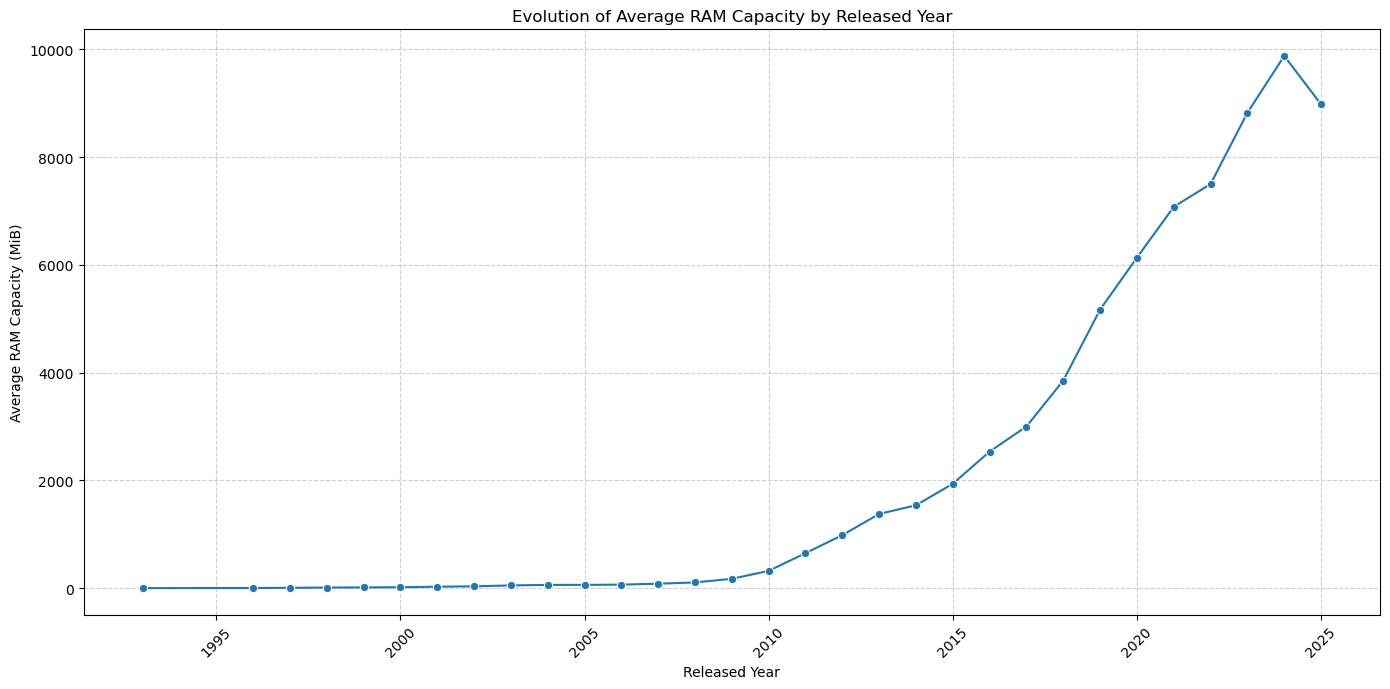

In [17]:
# --- Question 3: Evolution of Average RAM Capacity by Released Year ---
print("\n--- Analyzing Evolution of Average RAM Capacity by Released Year ---")

# Step 3.1: Clean 'RAM Capacity' column
# It's critical that 'data' is the DataFrame from the *immediately preceding loading step*.

# Show initial state of RAM Capacity as loaded.
print("\n'RAM Capacity' column info BEFORE this cleaning step:")
print(data['RAM Capacity'].dtype)
print("\nUnique values in 'RAM Capacity' (first 10) BEFORE this cleaning step:")
print(data['RAM Capacity'].unique()[:10])
print(f"Count of non-null values in 'RAM Capacity' BEFORE this cleaning step: {data['RAM Capacity'].count()}")


# Handle cases where 'RAM Capacity' might be float (e.g., NaN) or object (string).
# If it's an object, try to clean the strings.
if data['RAM Capacity'].dtype == 'object':
    # Convert to string, then replace patterns and strip spaces
    # This specifically targets patterns like ' MiB RAM', ' KB RAM', ' GB RAM', etc.
    # It will remove these suffixes and try to keep only numbers.
    # Using a more comprehensive regex to catch various units if they exist.
    data['RAM Capacity'] = data['RAM Capacity'].astype(str).str.replace(r'\s*(MiB|KB|GB|B)\s*RAM', '', regex=True).str.strip()
    data['RAM Capacity'] = data['RAM Capacity'].str.replace(r'\s*RAM', '', regex=True).str.strip() # Catch just ' RAM'
    data['RAM Capacity'] = data['RAM Capacity'].str.replace(r'\s*\([\d.]+\s*(MB|GB|MiB|KB)\)', '', regex=True).str.strip() # Remove things like (1024 MB)
    data['RAM Capacity'] = data['RAM Capacity'].str.replace(r'[a-zA-Z\s]', '', regex=True).str.strip() # Remove any other stray letters/spaces

    # After string cleaning, inspect again to see what values remain.
    print("\nUnique values in 'RAM Capacity' (first 10) AFTER aggressive string cleaning:")
    print(data['RAM Capacity'].unique()[:10])


# Convert 'RAM Capacity' to numeric, coercing errors to NaN.
# This will make any remaining non-numeric strings into NaN.
data['RAM Capacity'] = pd.to_numeric(data['RAM Capacity'], errors='coerce')

# Drop rows where 'RAM Capacity' is NaN after conversion (if any)
initial_rows_ram_after_numeric = data.shape[0]
data.dropna(subset=['RAM Capacity'], inplace=True)
rows_after_ram_dropna_numeric = data.shape[0]
if initial_rows_ram_after_numeric > rows_after_ram_dropna_numeric:
    print(f"\nDropped {initial_rows_ram_after_numeric - rows_after_ram_dropna_numeric} rows with missing or invalid 'RAM Capacity' after numeric conversion.")
else:
    print("\nNo rows dropped due to missing or invalid 'RAM Capacity' after numeric conversion (from this step).")


# Ensure 'Released Year' is also clean and integer for grouping (a safeguard)
if 'Released Year' in data.columns and data['Released Year'].dtype != 'int32':
    data['Released Year'] = pd.to_numeric(data['Released Year'], errors='coerce').astype('Int64') # Use Int64 to allow NaNs
    data.dropna(subset=['Released Year'], inplace=True) # Drop NaNs if any were introduced


# Step 3.2: Calculate average RAM Capacity per year
# Group by 'Released Year' and calculate the mean of 'RAM Capacity'
average_ram_per_year = data.groupby('Released Year')['RAM Capacity'].mean().reset_index()

# Filter out years with very few devices for more reliable averages (e.g., at least 5 devices)
years_with_enough_data = data['Released Year'].value_counts()
valid_years = years_with_enough_data[years_with_enough_data >= 5].index
average_ram_per_year = average_ram_per_year[average_ram_per_year['Released Year'].isin(valid_years)]


print("\n--- Average RAM Capacity Per Year (last 10 rows) ---")
print(average_ram_per_year.tail(10))

# Step 3.3: Visualize the trend
plt.figure(figsize=(14, 7))
sns.lineplot(x='Released Year', y='RAM Capacity', data=average_ram_per_year, marker='o')
plt.title('Evolution of Average RAM Capacity by Released Year')
plt.xlabel('Released Year')
plt.ylabel('Average RAM Capacity (MiB)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")


--- Analyzing Operating System Market Share ---

'Operating System' column info BEFORE cleaning:
object

Unique values in 'Operating System' (first 100 to catch variations):
['Google Android 15 (Vanilla Ice Cream)'
 'Google Android 14 (Upside Down Cake)' 'Apple iPadOS 18.3.2'
 'Apple iOS 18.3' 'Google Android 13 (Tiramisu)' 'Google Android 12 (S)'
 'Google Android 11 (R)' 'Google Android 14 Go Edition (Upside Down Cake)'
 'Google Wear OS 5.0' 'Google Wear OS 4.0' 'nan' 'Google Wear OS 3.5'
 'Google Wear OS 3.0' 'Samsung Tizen Wearable Platform'
 'Google Android 13 Go Edition (Tiramisu)'
 'Google Android 12 Go Edition (S)' 'Apple watchOS 10' 'Apple iPadOS 18'
 'Apple iOS 18' 'Huawei HarmonyOS 4.2' 'Huawei HarmonyOS 4'
 'Huawei HarmonyOS 3.0' 'Huawei HarmonyOS 2.0' 'Huawei HarmonyOS 3.1'
 'Microsoft Handheld PC 3.0 Professional Edition (Jupiter)'
 'Microsoft Handheld PC 2.0 (Mercury)' 'Google Android 8.1 (Oreo)'
 'Google Android 10 (Q)' 'Apple iPadOS 17.5' 'Apple iPadOS 17.4'
 'Google A

C:\Users\user\AppData\Local\Temp\ipykernel_14080\542615982.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=os_distribution_clean.index, y=os_distribution_clean.values, palette='plasma')


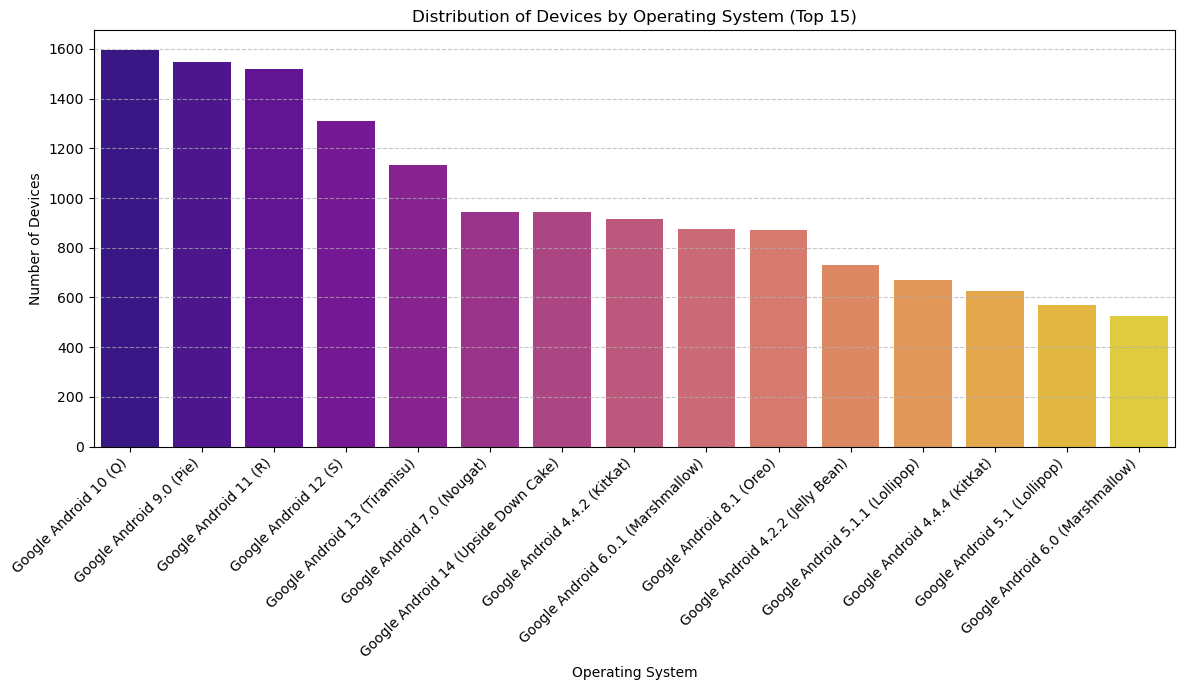

In [19]:
# --- Question 4: Operating System Market Share ---
print("\n--- Analyzing Operating System Market Share ---")

# Step 4.1: Inspect 'Operating System' column
print("\n'Operating System' column info BEFORE cleaning:")
print(data['Operating System'].dtype)
print("\nUnique values in 'Operating System' (first 100 to catch variations):")
# Convert to string and strip whitespace to handle variations like ' Android' vs 'Android '
unique_os_values = data['Operating System'].astype(str).str.strip().unique()
print(unique_os_values[:100]) # Print more to spot inconsistencies if any

# Step 4.2: Standardize OS names (if necessary) and count occurrences
# This is a common step for 'object' columns to group similar entries.
# Example: 'Android 10', 'Android 11' could be grouped under 'Android'.
# Let's check for major categories first, then refine if needed.

# Count the occurrences of each operating system
# Use .value_counts() and normalize=True to get percentages
os_distribution = data['Operating System'].astype(str).str.strip().value_counts()
print("\n--- Operating System Distribution (Top 15, excluding 'nan') ---")
# Filter out 'nan' string if it appears due to missing values after .astype(str)
os_distribution_clean = os_distribution[os_distribution.index != 'nan'].head(15)
print(os_distribution_clean)


# Step 4.3: Visualize the distribution using a bar chart (or pie chart if few categories)
# A bar chart is usually better for many categories.
plt.figure(figsize=(12, 7))
sns.barplot(x=os_distribution_clean.index, y=os_distribution_clean.values, palette='plasma')
plt.title('Distribution of Devices by Operating System (Top 15)')
plt.xlabel('Operating System')
plt.ylabel('Number of Devices')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# For a more aggregated view (e.g., just 'Android', 'iOS', 'Windows Phone', etc.)
# You might need to create a mapping function. Let's see the initial output first.
# Example of potential aggregation:
# def categorize_os(os_name):
#     os_name = str(os_name).lower()
#     if 'android' in os_name:
#         return 'Android'
#     elif 'ios' in os_name or 'iphone os' in os_name:
#         return 'iOS'
#     elif 'windows phone' in os_name or 'windows mobile' in os_name:
#         return 'Windows Phone'
#     elif 'blackberry' in os_name:
#         return 'BlackBerry OS'
#     elif 'feature phone' in os_name or 'proprietary' in os_name:
#         return 'Feature Phone OS'
#     elif 'nan' in os_name:
#         return 'Unknown'
#     else:
#         return 'Other'
#
# data['OS_Category'] = data['Operating System'].apply(categorize_os)
# os_category_distribution = data['OS_Category'].value_counts()
# print("\n--- Operating System Categories Distribution ---")
# print(os_category_distribution)


print("\n" + "="*80 + "\n") # Separator for next analysis

In [23]:
# --- Phase 2: Python for "Latest World News 2025" Analysis ---
# --- Step 1: Loading the News Data and Initial Inspection ---

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections # For counting keywords
import re # For regular expressions in text processing

# Set display options for better viewing of dataframes
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.width', 1000)       # Adjust display width
pd.set_option('display.max_colwidth', 200) # Increase column width for viewing text

print("--- Step 1: Loading the News Data ---")

# Define the path to your CSV file for the NEWS DATASET
# IMPORTANT: Ensure 'News_2025.csv' in your project folder is now the *actual news dataset*,
# and NOT the device specifications dataset.
file_path = 'News_2025.csv'

try:
    # Load the CSV data into a pandas DataFrame.
    # For news data, commas are likely delimiters, and quotes handle commas within text.
    # Default encoding (utf-8) is usually sufficient for text-heavy files.
    # No specific delimiter or engine like previous troubleshooting unless errors occur.
    data_news = pd.read_csv(file_path, quotechar='"')
    print(f"'{file_path}' (News Data) loaded successfully into a DataFrame named 'data_news'.")
    print(f"Dataset has {data_news.shape[0]} rows and {data_news.shape[1]} columns.\n")

    print("--- First 5 rows of the News dataset (data_news.head()) ---")
    print(data_news.head())
    print("\n" + "="*50 + "\n")

    print("--- Information about the News dataset (data_news.info()) ---")
    data_news.info()
    print("\n" + "="*50 + "\n")

    print("--- Summary statistics of numerical columns (data_news.describe()) ---")
    print(data_news.describe()) # Likely less useful for text data, but good for completeness
    print("\n" + "="*50 + "\n")

    print("--- Check for missing values (data_news.isnull().sum()) ---")
    print(data_news.isnull().sum())
    print("\n" + "="*50 + "\n")

    # Important: Convert 'publishedAt' to datetime objects for time-based analysis
    print("--- Converting 'publishedAt' to datetime ---")
    data_news['publishedAt'] = pd.to_datetime(data_news['publishedAt'], errors='coerce')
    print(f"New dtype for 'publishedAt': {data_news['publishedAt'].dtype}")
    print(f"Missing values in 'publishedAt' after conversion: {data_news['publishedAt'].isnull().sum()}\n")
    print("\n" + "="*50 + "\n")


except FileNotFoundError:
    print(f"Error: The file '{file_path}' (News Data) was not found.")
    print("Please make sure the correct 'News_2025.csv' file (for news) is in the same directory as this notebook, or update the 'file_path' variable with the correct full path.")
    print("Remember to extract it from the Kaggle 'archive.zip' if you haven't already.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    print("This might be due to unexpected characters or different file formatting.")
    print("If error persists, consider trying: pd.read_csv(file_path, quotechar='\"', encoding='latin1') or a different delimiter.")

--- Step 1: Loading the News Data ---
An error occurred while loading the data: Error tokenizing data. C error: Expected 196 fields in line 3, saw 228

This might be due to unexpected characters or different file formatting.
If error persists, consider trying: pd.read_csv(file_path, quotechar='"', encoding='latin1') or a different delimiter.


In [25]:
# --- Phase 2: Python for "Latest World News 2025" Analysis ---
# --- Step 1: Loading the News Data and Initial Inspection (Robust Version) ---

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections # For counting keywords
import re # For regular expressions in text processing

# Set display options for better viewing of dataframes
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.width', 1000)       # Adjust display width
pd.set_option('display.max_colwidth', 200) # Increase column width for viewing text-based columns

print("--- Step 1: Loading the News Data ---")

# Define the path to your CSV file for the NEWS DATASET
# IMPORTANT: Ensure 'News_2025.csv' in your project folder is now the *actual news dataset*,
# and NOT the device specifications dataset.
file_path = 'News_2025.csv'

try:
    # Load the CSV data into a pandas DataFrame.
    # Applying all robust loading parameters that eventually worked for the previous problematic file:
    #   quotechar='"': handles commas inside quoted fields.
    #   encoding='ISO-8859-1': handles character encoding issues.
    #   engine='python': uses the slower but more flexible Python parsing engine.
    #   on_bad_lines='skip': skips malformed lines, allowing the rest of the file to load.
    #   delimiter=',': explicit comma delimiter (standard for CSVs).
    data_news = pd.read_csv(
        file_path,
        quotechar='"',
        encoding='ISO-8859-1', # Try this encoding first, then 'latin1' if needed
        engine='python',
        on_bad_lines='skip',
        delimiter=',' # Assuming it's a comma-separated file, which is typical for news data
    )
    print(f"'{file_path}' (News Data) loaded successfully into a DataFrame named 'data_news'.")
    print(f"Dataset has {data_news.shape[0]} rows and {data_news.shape[1]} columns.\n")

    print("--- First 5 rows of the News dataset (data_news.head()) ---")
    print(data_news.head())
    print("\n" + "="*50 + "\n")

    print("--- Information about the News dataset (data_news.info()) ---")
    data_news.info()
    print("\n" + "="*50 + "\n")

    print("--- Summary statistics of numerical columns (data_news.describe()) ---")
    print(data_news.describe()) # Likely less useful for text data, but good for completeness
    print("\n" + "="*50 + "\n")

    print("--- Check for missing values (data_news.isnull().sum()) ---")
    print(data_news.isnull().sum())
    print("\n" + "="*50 + "\n")

    # Important: Convert 'publishedAt' to datetime objects for time-based analysis
    print("--- Converting 'publishedAt' to datetime ---")
    if 'publishedAt' in data_news.columns:
        data_news['publishedAt'] = pd.to_datetime(data_news['publishedAt'], errors='coerce')
        print(f"New dtype for 'publishedAt': {data_news['publishedAt'].dtype}")
        print(f"Missing values in 'publishedAt' after conversion: {data_news['publishedAt'].isnull().sum()}\n")
    else:
        print("'publishedAt' column not found. Cannot convert to datetime.")
    print("\n" + "="*50 + "\n")


except FileNotFoundError:
    print(f"Error: The file '{file_path}' (News Data) was not found.")
    print("Please make sure the correct 'News_2025.csv' file (for news) is in the same directory as this notebook, or update the 'file_path' variable with the correct full path.")
    print("Remember to extract it from the Kaggle 'archive.zip' if you haven't already.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    print("This indicates a severe issue with the file format even with robust options.")
    print("Consider manually opening the CSV in a text editor to inspect line 3 and its structure.")
    print("You might need to try 'encoding='latin1'' if 'ISO-8859-1' still fails.")

--- Step 1: Loading the News Data ---
'News_2025.csv' (News Data) loaded successfully into a DataFrame named 'data_news'.
Dataset has 21157 rows and 1 columns.

--- First 5 rows of the News dataset (data_news.head()) ---
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [27]:
# --- Phase 2: Python for "Latest World News 2025" Analysis ---
# --- Step 1: Loading the News Data and Initial Inspection (CONFIRMED NEWS FILE) ---

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections # For counting keywords
import re # For regular expressions in text processing

# Set display options for better viewing of dataframes
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.width', 1000)       # Adjust display width
pd.set_option('display.max_colwidth', 200) # Increase column width for viewing text-based columns

print("--- Step 1: Loading the News Data ---")

# Define the path to your CSV file for the NEWS DATASET
# IMPORTANT: Confirm this 'News_2025.csv' is the actual NEWS data (titles, sources, dates)
# and NOT the device specifications data.
file_path = 'News_2025.csv'

try:
    # Load the CSV data into a pandas DataFrame.
    # We will try robust parameters as the news file might also be tricky.
    # ASSUMING NEWS CSV IS COMMA-DELIMITED (standard CSV)
    data_news = pd.read_csv(
        file_path,
        quotechar='"',
        encoding='ISO-8859-1', # Common encoding for mixed text data
        engine='python',        # Robust engine
        on_bad_lines='skip',    # Skip problematic lines
        delimiter=','           # Standard CSV delimiter (comma)
    )
    print(f"'{file_path}' (News Data) loaded successfully into a DataFrame named 'data_news'.")
    print(f"Dataset has {data_news.shape[0]} rows and {data_news.shape[1]} columns.\n")

    print("--- First 5 rows of the News dataset (data_news.head()) ---")
    print(data_news.head())
    print("\n" + "="*50 + "\n")

    print("--- Information about the News dataset (data_news.info()) ---")
    data_news.info()
    print("\n" + "="*50 + "\n")

    print("--- Summary statistics of numerical columns (data_news.describe()) ---")
    print(data_news.describe()) # Likely less useful for text data, but good for completeness
    print("\n" + "="*50 + "\n")

    print("--- Check for missing values (data_news.isnull().sum()) ---")
    print(data_news.isnull().sum())
    print("\n" + "="*50 + "\n")

    # Important: Convert 'publishedAt' to datetime objects for time-based analysis
    print("--- Converting 'publishedAt' to datetime ---")
    if 'publishedAt' in data_news.columns:
        data_news['publishedAt'] = pd.to_datetime(data_news['publishedAt'], errors='coerce')
        print(f"New dtype for 'publishedAt': {data_news['publishedAt'].dtype}")
        print(f"Missing values in 'publishedAt' after conversion: {data_news['publishedAt'].isnull().sum()}\n")
    else:
        print("WARNING: 'publishedAt' column not found. Please ensure the correct news CSV is loaded.")
    print("\n" + "="*50 + "\n")


except FileNotFoundError:
    print(f"ERROR: The file '{file_path}' (News Data) was not found.")
    print("Please make sure the correct 'News_2025.csv' file (for news) is in the same directory as this notebook, or update the 'file_path' variable with the correct full path.")
    print("Remember to extract it from the Kaggle 'archive.zip' if you haven't already.")
except Exception as e:
    print(f"AN UNEXPECTED ERROR OCCURRED WHILE LOADING THE NEWS DATA: {e}")
    print("This indicates a severe issue with the file format. Try 'encoding='latin1'' instead of 'ISO-8859-1'.")
    print("If problem persists, check the CSV in a text editor to confirm delimiter (comma vs semicolon).")

--- Step 1: Loading the News Data ---
'News_2025.csv' (News Data) loaded successfully into a DataFrame named 'data_news'.
Dataset has 21157 rows and 1 columns.

--- First 5 rows of the News dataset (data_news.head()) ---
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           


--- Analyzing Operating System Market Share (Categorized) ---

'Operating System' column info BEFORE categorization:
object

Unique values in 'Operating System' (first 100 to catch variations) BEFORE categorization:
['Google Android 15 (Vanilla Ice Cream)'
 'Google Android 14 (Upside Down Cake)' 'Apple iPadOS 18.3.2'
 'Apple iOS 18.3' 'Google Android 13 (Tiramisu)' 'Google Android 12 (S)'
 'Google Android 11 (R)' 'Google Android 14 Go Edition (Upside Down Cake)'
 'Google Wear OS 5.0' 'Google Wear OS 4.0' 'nan' 'Google Wear OS 3.5'
 'Google Wear OS 3.0' 'Samsung Tizen Wearable Platform'
 'Google Android 13 Go Edition (Tiramisu)'
 'Google Android 12 Go Edition (S)' 'Apple watchOS 10' 'Apple iPadOS 18'
 'Apple iOS 18' 'Huawei HarmonyOS 4.2' 'Huawei HarmonyOS 4'
 'Huawei HarmonyOS 3.0' 'Huawei HarmonyOS 2.0' 'Huawei HarmonyOS 3.1'
 'Microsoft Handheld PC 3.0 Professional Edition (Jupiter)'
 'Microsoft Handheld PC 2.0 (Mercury)' 'Google Android 8.1 (Oreo)'
 'Google Android 10 (Q)' 'Apple i

C:\Users\user\AppData\Local\Temp\ipykernel_14080\1145754436.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=os_category_distribution.index, y=os_category_distribution.values, palette='cubehelix') # Different palette


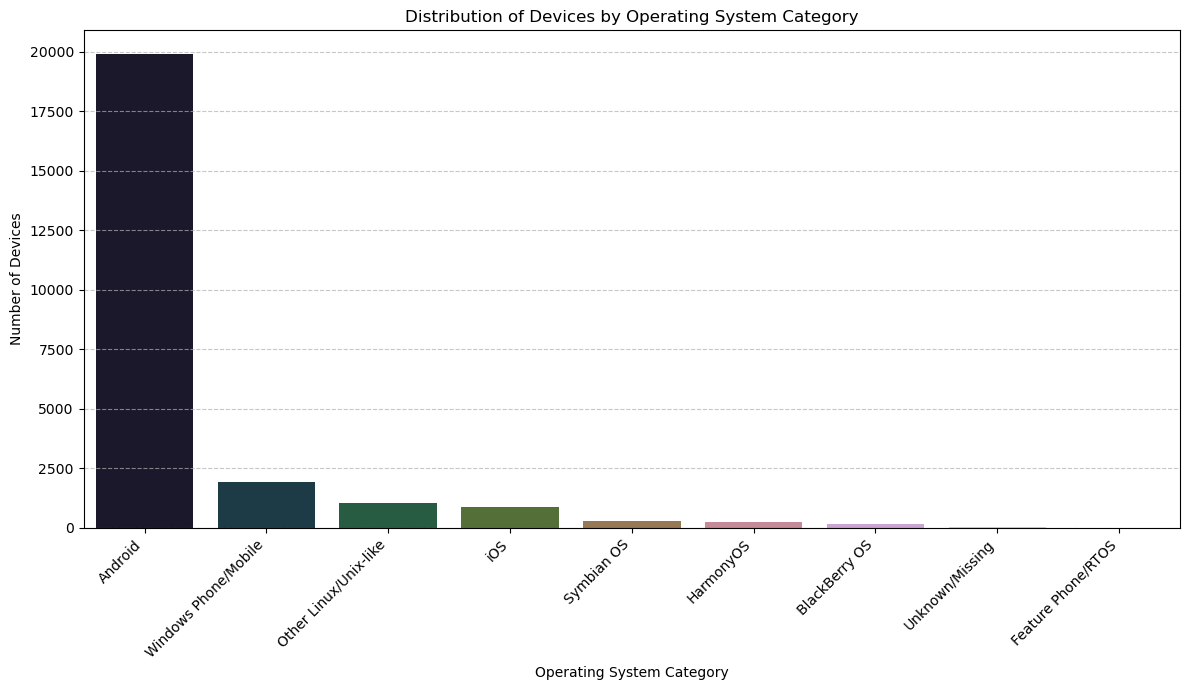

In [32]:
# --- Question 4: Refined Operating System Market Share ---
print("\n--- Analyzing Operating System Market Share (Categorized) ---")

# Step 4.1: Inspect 'Operating System' column (initial state)
print("\n'Operating System' column info BEFORE categorization:")
print(data['Operating System'].dtype)
print("\nUnique values in 'Operating System' (first 100 to catch variations) BEFORE categorization:")
# Convert to string and strip whitespace for consistent processing
unique_os_values = data['Operating System'].astype(str).str.strip().unique()
print(unique_os_values[:100])

# Step 4.2: Create a new 'OS_Category' column by categorizing OS names
# This function will map specific OS strings to broader categories.
def categorize_os(os_name):
    os_name = str(os_name).lower() # Convert to lowercase for case-insensitive matching
    if 'android' in os_name:
        return 'Android'
    elif 'ios' in os_name or 'iphone os' in os_name:
        return 'iOS'
    elif 'windows phone' in os_name or 'windows mobile' in os_name or 'windows' in os_name:
        return 'Windows Phone/Mobile'
    elif 'harmonyos' in os_name:
        return 'HarmonyOS'
    elif 'blackberry' in os_name:
        return 'BlackBerry OS'
    elif 'symbian' in os_name:
        return 'Symbian OS'
    elif 'kaios' in os_name:
        return 'KaiOS'
    elif 'feature phone' in os_name or 'proprietary' in os_name or 'rtos' in os_name:
        return 'Feature Phone/RTOS' # RTOS = Real-Time Operating System, common for basic phones
    elif 'nan' in os_name or os_name == 'none' or os_name == '':
        return 'Unknown/Missing' # Handle actual missing values or empty strings
    else:
        return 'Other Linux/Unix-like' # Catch other less common or specialized OSes

# Apply the categorization function to create the new column
data['OS_Category'] = data['Operating System'].apply(categorize_os)

print("\n--- New 'OS_Category' column created ---")
print("Unique values in 'OS_Category':") # Corrected print statement
print(data['OS_Category'].unique())


# Step 4.3: Count the distribution of the new OS categories
os_category_distribution = data['OS_Category'].value_counts()

print("\n--- Operating System Category Distribution ---")
print(os_category_distribution)


# Step 4.4: Visualize the distribution using a bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=os_category_distribution.index, y=os_category_distribution.values, palette='cubehelix') # Different palette
plt.title('Distribution of Devices by Operating System Category')
plt.xlabel('Operating System Category')
plt.ylabel('Number of Devices')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n") # Separator for next analysis